In [1]:
import numpy as np

Lemke-Howson Algorithm

In [2]:
def pivoting(tableau, basic_vars, pivot):
    with np.errstate(divide='ignore'):
        ratios = tableau[:, -1] / tableau[:, pivot]
    row_min = ratios.argmin()
    tableau[row_min, :] /= tableau[row_min, pivot]
    for i in range(tableau.shape[0]):
        if i != row_min:
            tableau[i, :] -= tableau[i, pivot] * tableau[row_min, :]
    basic_vars[row_min], pivot = pivot, basic_vars[row_min]
    return pivot

In [3]:
def create_tableau(A, B):
    B_T = B.T
    m, n = A.shape
    tableaus = []
    for i in range(2):
        tableaus.append(np.empty((A.shape[1-i], m+n+1)))
        tableaus[i][:, :m] = [B_T, np.identity(m)][i]
        tableaus[i][:, m:m+n] = [np.identity(n), A][i]
        tableaus[i][:, -1] = 1
    basic_vars_list = [np.arange(m, m+n), np.arange(m)]
    return tableaus, basic_vars_list

In [9]:
def Lemke_Howson(A, B, init_pivot):
    m, n = A.shape
    pivot = init_pivot
    tableaus, basic_vars_list = create_tableau(A, B)
    players = [init_pivot // m, 1 - init_pivot // m]
    while True:
        for i in players:
            #print(i, tableaus[i])
            pivot = pivoting(tableaus[i], basic_vars_list[i], pivot)
            #print(tableaus[i], basic_vars_list[i])
            if pivot == init_pivot:
                break
        else:
            continue
        break
        
    #summarize the found NE
    out = np.zeros(m+n)
    for i, (start, num) in enumerate(zip([0, m], [m, n])):
        ind = basic_vars_list[i] < start + num if i == 0 else start <= basic_vars_list[i]
        out[basic_vars_list[i][ind]] = tableaus[i][ind, -1]
        out[start:start+num] /= out[start:start+num].sum()
    
    return out[:m], out[m:]

Imitation

In [6]:
def create_imitation(x, y):
    n = x.shape[0]
    A = np.empty((n, n))
    B = np.eye(n)
    
    for i in range(len(x)):
        A[i, :] = -(x[i] - y) ** 2
    
    return A, B

In [19]:
def imitation_to_kakutani(F):
    
    x = np.array([1])
    y = np.array([])
    epsilon = 10e-15

    #Because we may meet some bugs, we need to avoid infinite loop and dead kernel
    count = 0

    while True:
        y = np.append(y, F(x[-1]))
        A, B = create_imitation(x, y)
        #I don't know why my code only works when I use init_pivot = len(x) - 1
        #if I use init_pivot = 0 all the time, the Lemke Howson algorithm won't work
        init_pivot = len(x) - 1
        rho = Lemke_Howson(A, B, init_pivot)[1]
        x = np.append(x, np.dot(rho, y))

        if x[-1] - epsilon < x[-2] < x[-1] + epsilon:
            break

        #break when loop over 100 times no matter convergence or not
        count += 1
        if count > 100:
            break
    
    return x, y

In [35]:
x1, y1 = imitation_to_kakutani(lambda x: 0.5 * x - 1)
x2, y2 = imitation_to_kakutani(lambda x: -0.2 * x + 2)

In [36]:
print(x1, x2)

[ 1.         -0.5        -1.25       -1.625      -1.8125     -1.90625
 -1.953125   -1.9765625  -1.98828125 -1.99414062 -1.99707031 -1.99853516
 -1.99926758 -1.99963379 -1.99981689 -1.99990845 -1.99995422 -1.99997711
 -1.99998856 -1.99999428 -1.99999714 -1.99999857 -1.99999928 -1.99999964
 -1.99999982 -1.99999991 -1.99999996 -1.99999998 -1.99999999 -1.99999999
 -2.         -2.         -2.         -2.         -2.         -2.         -2.
 -2.         -2.         -2.         -2.         -2.         -2.         -2.
 -2.         -2.         -2.         -2.         -2.         -2.        ] [ 1.          1.8         1.64        1.672       1.6656      1.66688
  1.666624    1.6666752   1.66666496  1.66666701  1.6666666   1.66666668
  1.66666666  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667]


In [37]:
-1 / (1 - 0.5)

-2.0

In [38]:
2 / (1 + 0.2)

1.6666666666666667

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

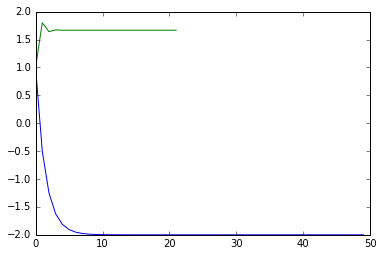

In [40]:
plt.figure()
plt.plot(range(len(x1)), x1, range(len(x2)), x2)
plt.show()